In [1]:
# HPC
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# Paths and stuff
import os
import sys

# For surfvel data in tif files
import rasterio
from rasterio.transform import from_origin

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
xModel10 = np.arange(-72.,97.,1.0)*10
yModel10 = np.arange(-345.,-56.,1.0)*10
xModel16 = np.arange(-72.,97.,1.6)*10
yModel16 = np.arange(-345.,-56.,1.6)*10
xModel40 = np.arange(-72.,97.,4.0)*10
yModel40 = np.arange(-345.,-56.,4.0)*10

dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_age  = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid.nc')

# !rm /scratch2/shreyas/GrIS_paleo_data/RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc
# ds_age_correct = ageData.correctAgeDataset(ds_age,
#                             path = dataPath,
#                             filename = 'RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc',
#                             zetaLevels = 26,
#                             unCorrupt = True)
ds_age_correct = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc')
ds_bm5 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/BedMachineGreenland-v5.nc")
ds_bm5_orig = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms_orig.nc")

modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp0006.nc')

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['units'] = 'a'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['standard_name'] = 'land_ice_kc_layer_age_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['long_name'] = 'Age uncertainty in the upper (kc) ice layer'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert_real'].attrs['grid_mapping'] = 'mapping'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['units'] = 'a'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['standard_name'] = 'land_ice_kc_layer_age_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['long_name'] = 'Age uncertainty in the upper (kc) ice layer'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H'] / 10.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['standard_name'] = 'land_ice_thickness_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['long_name'] = 'Ice thickness uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs']*0.0 + 5.0
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['standard_name'] = 'land_ice_surface_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['long_name'] = 'Ice surface uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zs_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H_uncert'].copy()
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].where(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'] > 1.0, 1.0)
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['units'] = 'm'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['standard_name'] = 'land_ice_bed_uncert'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['long_name'] = 'Ice bed uncertainty'
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zl_uncert'].attrs['grid_mapping'] = 'mapping'

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp.to_netcdf('/scratch2/shreyas/GrIS_paleo_data/fake_age_data_40kms.nc', mode='w')
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp.to_netcdf('/scratch2/shreyas/GrIS_paleo_data/fake_bm5_data_40kms.nc', mode='w')

In [3]:
# -----------------------------
# Geometry helper
def frac_area(x, y, xx, yy):
    x = np.sort(x)
    y = np.sort(y)
    xx = np.sort(xx)
    yy = np.sort(yy)

    dx_inv = 1.0 / (x[1] - x[0])
    dy_inv = 1.0 / (y[1] - y[0])

    xxm = (np.array(xx) - x[0]) * dx_inv
    yym = (np.array(yy) - y[0]) * dy_inv

    if (xxm[1] - xxm[0] > 1) or (yym[1] - yym[0] > 1):
        return 0.0

    if 0 <= xxm[0] and xxm[1] <= 1 and 0 <= yym[0] and yym[1] <= 1:
        return 1.0
    if 0 <= xxm[0] and xxm[1] <= 1:
        if yym[0] < 0 < yym[1]:
            return yym[1] / (yym[1] - yym[0])
        elif yym[0] < 1 < yym[1]:
            return (1 - yym[0]) / (yym[1] - yym[0])
        return 0.0
    if 0 <= yym[0] and yym[1] <= 1:
        if xxm[0] < 0 < xxm[1]:
            return xxm[1] / (xxm[1] - xxm[0])
        elif xxm[0] < 1 < xxm[1]:
            return (1 - xxm[0]) / (xxm[1] - xxm[0])
        return 0.0

    denom = (xxm[1] - xxm[0]) * (yym[1] - yym[0])
    if denom == 0:
        return 0.0
    if xxm[0] < 0 < xxm[1] and yym[0] < 0 < yym[1]:
        return xxm[1] * yym[1] / denom
    if xxm[0] < 1 < xxm[1] and yym[0] < 0 < yym[1]:
        return (1 - xxm[0]) * yym[1] / denom
    if xxm[0] < 0 < xxm[1] and yym[0] < 1 < yym[1]:
        return xxm[1] * (1 - yym[0]) / denom
    if xxm[0] < 1 < xxm[1] and yym[0] < 1 < yym[1]:
        return (1 - xxm[0]) * (1 - yym[0]) / denom
    return 0.0

# -----------------------------
# Downsampling + masks
def area_weighted_downsample_with_mask(fields_bm, masks_bm, x_bm, y_bm, x_sico, y_sico, dx, dx_bm, zl_deep_ocean, zl_uncert_deep_ocean):
    shape = (len(y_sico), len(x_sico))
    out_fields = {k: np.zeros(shape) for k in fields_bm}
    out_masks = {k: np.zeros(shape) for k in masks_bm}

    for j, y in enumerate(y_sico):
        for i, x in enumerate(x_sico):
            if x < x_bm[0] or x > x_bm[-1] or y < y_bm[0] or y > y_bm[-1]:
                out_masks["ocean"][j, i] = 1
                if "zl" in out_fields:
                    out_fields["zl"][j, i] = zl_deep_ocean
                if "zl_uncert" in out_fields:
                    out_fields["zl_uncert"][j, i] = zl_uncert_deep_ocean
                continue
            x1, x2 = x - 0.5*(dx + dx_bm), x + 0.5*(dx + dx_bm)
            y1, y2 = y - 0.5*(dx + dx_bm), y + 0.5*(dx + dx_bm)
            ii1 = int(np.floor((x1 - x_bm[0]) / dx_bm))
            ii2 = int(np.ceil((x2 - x_bm[0]) / dx_bm))
            jj1 = int(np.floor((y1 - y_bm[0]) / dx_bm))
            jj2 = int(np.ceil((y2 - y_bm[0]) / dx_bm))

            weight_sum = 0.0
            field_sum = {k: 0.0 for k in fields_bm}
            mask_sum = {k: 0.0 for k in masks_bm}

            for jj in range(jj1, jj2):
                for ii in range(ii1, ii2):
                    if 0 <= ii < len(x_bm) and 0 <= jj < len(y_bm):
                        weight = frac_area(
                            [x - 0.5*dx, x + 0.5*dx],
                            [y - 0.5*dx, y + 0.5*dx],
                            [x_bm[ii] - 0.5*dx_bm, x_bm[ii] + 0.5*dx_bm],
                            [y_bm[jj] - 0.5*dx_bm, y_bm[jj] + 0.5*dx_bm]
                        )
                        for k in fields_bm:
                            field_sum[k] += weight * fields_bm[k][jj, ii]
                        for k in masks_bm:
                            mask_sum[k] += weight * masks_bm[k][jj, ii]
                        weight_sum += weight

            if weight_sum > 0:
                for k in fields_bm:
                    out_fields[k][j, i] = field_sum[k] / weight_sum
                for k in masks_bm:
                    out_masks[k][j, i] = mask_sum[k] / weight_sum

    return out_fields, out_masks

# -----------------------------
# Ocean connectivity
def ocean_connectivity(mask, imax, jmax, zs=None):
    mask_c = np.zeros((jmax + 1, imax + 1), dtype=np.int16)
    mask_c[0:2, :] = 1
    mask_c[-2:, :] = 1
    mask_c[:, 0:2] = 1
    mask_c[:, -2:] = 1
    flag_change = True
    while flag_change:
        mask_c_save = mask_c.copy()
        for j in range(1, jmax):
            for i in range(1, imax):
                if mask_c_save[j, i] == 1:
                    for dj in [-1, 0, 1]:
                        for di in [-1, 0, 1]:
                            nj, ni = j + dj, i + di
                            if 0 <= ni <= imax and 0 <= nj <= jmax:
                                if mask[nj, ni] >= 2:
                                    mask_c[nj, ni] = 1
                                if zs is not None and mask[nj, ni] <= 1 and zs[nj, ni] < 0.0:
                                    mask_c[nj, ni] = 1
        flag_change = not np.array_equal(mask_c, mask_c_save)
    return mask_c

# -----------------------------
# Main
ds = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/BedMachineGreenland-v5.nc")

x_bm = ds["x"].values.astype(np.float64) / 1000.0
y_bm = ds["y"].values[::-1].astype(np.float64) / 1000.0
dx_bm = x_bm[1] - x_bm[0]

zl_bm = np.flip(ds["bed"].values, axis=0)
err_bm = np.flip(ds["errbed"].values, axis=0)
zs_bm = np.flip(ds["surface"].values, axis=0)
H_bm = np.flip(ds["thickness"].values, axis=0)
mask_bm = np.flip(ds["mask"].values, axis=0).astype(np.int16)

xmin, xmax = -632, 846
ymin, ymax = -3344, -670
dx = 1.0
x_age = np.arange(xmin, xmax + dx, dx)
y_age = np.arange(ymin, ymax + dx, dx)
imax, jmax = len(x_age) - 1, len(y_age) - 1
zl_deep_ocean = -4000.0
zl_uncert_deep_ocean = -2.e9

regions = [
    (np.array([xmin, -1190]), np.array([110, ymax])),
    (np.array([400, ymax]), np.array([xmax, -900])),
    (np.array([xmax, -2250]), np.array([250, ymin])),
    (np.array([-300, ymin]), np.array([xmin, -2000]))
]
for p1, p2 in regions:
    v = p2 - p1
    for j in range(len(y_bm)):
        for i in range(len(x_bm)):
            test = np.array([x_bm[i], y_bm[j]]) - p1
            if v[0]*test[1] - v[1]*test[0] > 0:
                mask_bm[j, i] = 4

logical_masks = {
    "grounded": (mask_bm == 2).astype(np.float64),
    "floating": (mask_bm == 3).astype(np.float64),
    "land":     (mask_bm == 1).astype(np.float64),
    "ocean":    (mask_bm == 0).astype(np.float64),
    "nongrlld": (mask_bm == 4).astype(np.float64)
}

fields_bm = {"zl": zl_bm, "zl_uncert": err_bm, "zs": zs_bm, "H": H_bm}
fields_ds, r_masks = area_weighted_downsample_with_mask(fields_bm, logical_masks, x_bm, y_bm, x_age, y_age, dx, dx_bm, zl_deep_ocean, zl_uncert_deep_ocean)

zl = fields_ds["zl"]
zl_uncert = fields_ds["zl_uncert"]
zs = fields_ds["zs"]
H = fields_ds["H"]

stack = np.stack([r_masks[k] for k in ["grounded", "floating", "land", "ocean", "nongrlld"]])
mask = np.take([0, 3, 1, 2, 2], np.argmax(stack, axis=0))

zl[r_masks["nongrlld"] > 0.1] = zl_deep_ocean
zl_uncert[r_masks["nongrlld"] > 0.1] = zl_uncert_deep_ocean

mask_c = ocean_connectivity(mask, imax, jmax)
mask[(mask >= 2) & (mask_c == 0)] = 1

H = np.maximum(H, 0.0)
zs = np.maximum(zs, 0.0)
zb = np.zeros_like(zl)
H_offset = 10.0
rho_i = 910.0
rho_sw = 1028.0

floating = (mask == 3)
H[floating] = np.maximum(H[floating], H_offset)
zs[floating] = H[floating] * (rho_sw - rho_i) / rho_sw
zb[floating] = zs[floating] - H[floating]
bad_float = floating & (zb < zl)
mask[bad_float] = 0
zb[bad_float] = zl[bad_float]
zs[bad_float] = zb[bad_float] + H[bad_float]

grounded = (mask == 0)
H[grounded] = np.maximum(H[grounded], H_offset)
zb[grounded] = zl[grounded]
zs[grounded] = zb[grounded] + H[grounded]

land = (mask == 1)
zb[land] = zl[land]
zs[land] = zl[land]
H[land] = 0.0

ocean = (mask == 2)
above_sea = ocean & (zl > 0)
below_sea = ocean & (zl <= 0)
mask[above_sea] = 1
zb[above_sea] = zl[above_sea]
zs[above_sea] = zl[above_sea]
H[above_sea] = 0.0
zb[below_sea] = 0.0
zs[below_sea] = 0.0
H[below_sea] = 0.0

mask_c = ocean_connectivity(mask, imax, jmax, zs=zs)
disconnect_ocean = (mask >= 2) & (mask_c == 0)
mask[disconnect_ocean] = 1
zb[disconnect_ocean] = zl[disconnect_ocean]
zs[disconnect_ocean] = zl[disconnect_ocean]
H[disconnect_ocean] = 0.0
unmasked_negative = (mask <= 1) & (mask_c == 1) & (zs < 0.0)
mask[unmasked_negative] = 2
zs[unmasked_negative] = 0.0
zb[unmasked_negative] = 0.0
H[unmasked_negative] = 0.0

mask_maxextent = np.zeros_like(mask, dtype=np.int16)
mask_maxextent[(mask == 0) | (mask == 3)] = 1
mask_maxextent = np.where(ocean_connectivity(1 - mask_maxextent, imax, jmax) == 0, 1, mask_maxextent)

print("Preprocessing complete.")

Preprocessing complete.


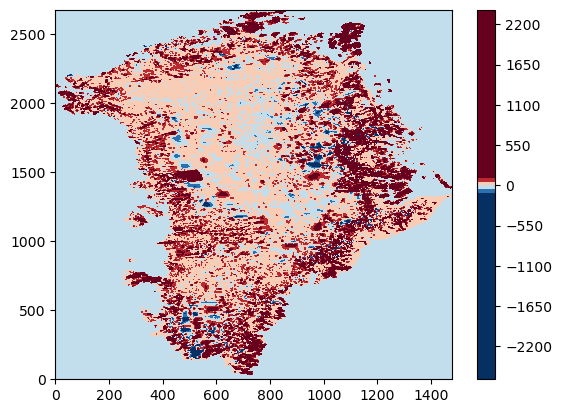

In [10]:
plt.contourf(H-ds_age_correct["H"].data, vmin = -100, vmax = 100, cmap = "RdBu_r", levels = 100)
plt.colorbar()